# Tugas Praktikum

### 1. Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

#### Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### Langkah 2 - Load CIFAR-10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


#### Langkah 3 - Normalisasi nilai piksel menjadi antara 0 dan 1

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Langkah 4 - Buat model CNN

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.35))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

#### Langkah 5 - Compile Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Langkah 6 - Latih model dengan lebih banyak epoch

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 51s 22ms/step - loss: 1.5644 - accuracy: 0.4639 - val_loss: 1.1467 - val_accuracy: 0.5917
Epoch 2/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9455 - accuracy: 0.6710 - val_loss: 0.9367 - val_accuracy: 0.6806
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7696 - accuracy: 0.7344 - val_loss: 0.8794 - val_accuracy: 0.6942
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6558 - accuracy: 0.7770 - val_loss: 0.8545 - val_accuracy: 0.7117
Epoch 5/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5605 - accuracy: 0.8080 - val_loss: 0.5964 - val_accuracy: 0.7972
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4897 - accuracy: 0.8342 - val_loss: 0.6664 - val_accuracy: 0.7796
Epoch 7/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4255 - accuracy: 0.8563 - val_loss: 0.5191 -

#### Langkah 7 - Evaluasi hasil model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.5527 - accuracy: 0.8516 - 2s/epoch - 6ms/step
Test accuracy: 0.8515999913215637


#### Langkah 8 - Menampilkan Histogram

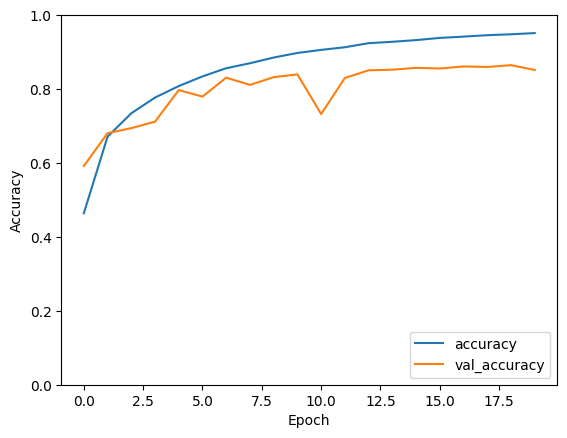

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### 2. Buatlah model CNN untuk klasifikasi dataset MNIST

#### Langkah 1 - Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### Langkah 2 - Load Mnist dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Langkah 3 - Normalisasikan nilai piksel menjadi antara 0 dan 1

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Langkah 4 - Buat model CNN


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#### Langkah 5 - Compile modelnya

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Langkah 6 - Latih model dengan lebih banyak epoch

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1424 - accuracy: 0.9555 - val_loss: 0.0858 - val_accuracy: 0.9730
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0279 - val_accuracy: 0.9906
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.0291 - val_accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0374 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0312 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0386 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0335 - val_accur

#### Langkah 7 - Evaluasi hasil model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0378 - accuracy: 0.9913 - 851ms/epoch - 3ms/step
Test accuracy: 0.9912999868392944


#### Langkah 8 - Menampilkan Histogram

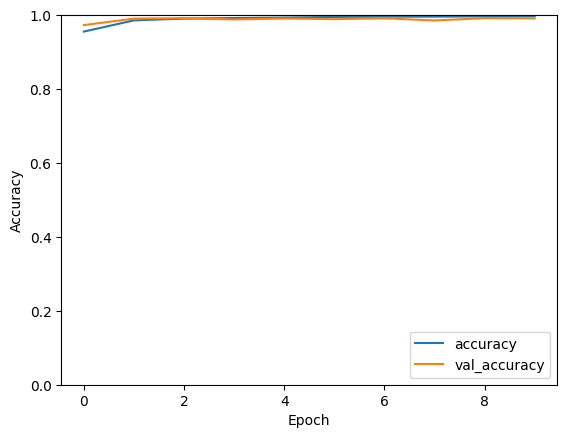

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()